In [2]:
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
closures_noise = numpy.load("../data/EQ28XX_Fornax_GLEAM_all_FOV_30_ephemeris_HERA61_noisy.npz")
closures_noiseless = numpy.load("../data/EQ28XX_Fornax_GLEAM_all_FOV_30_ephemeris_HERA61_noiseless.npz")

In [3]:
print(list(closures_noiseless.keys()))

['triads', 'flags', 'last', 'closures', 'days']


In [4]:
cl_n = closures_noise['closures']
cl_nn = closures_noiseless['closures']

In [5]:
print(cl_n.shape)
print(cl_nn.shape)

(120, 4, 37, 1024)
(120, 4, 37, 1024)


In [6]:
def calculate_circular_dev(closures):
    cl_x = numpy.cos(closures)
    cl_y = numpy.sin(closures)
    av_x = numpy.mean(cl_x, axis=2)
    av_y = numpy.mean(cl_y, axis=2)
    
    # Calculate mean vector inside unit circle
    r = numpy.sqrt(numpy.square(av_x) + numpy.square(av_y))
    # Then calculate circular standard deviation
    std_dev = numpy.sqrt(-2 * numpy.log(r))
    return std_dev
    
stdev_noise = calculate_circular_dev(cl_n)
stdev_noiseless = calculate_circular_dev(cl_nn)

In [7]:
print(stdev_noise.shape)
print(stdev_noiseless.shape)

(120, 4, 1024)
(120, 4, 1024)


[[0.13382038 0.13382038 0.13382038 0.13382038]
 [0.13394456 0.13394456 0.13394456 0.13394456]
 [0.13406874 0.13406874 0.13406874 0.13406874]
 [0.13419293 0.13419293 0.13419293 0.13419293]
 [0.13431711 0.13431711 0.13431711 0.13431711]
 [0.13444129 0.13444129 0.13444129 0.13444129]
 [0.13456547 0.13456547 0.13456547 0.13456547]
 [0.13468965 0.13468965 0.13468965 0.13468965]
 [0.13481383 0.13481383 0.13481383 0.13481383]
 [0.13493802 0.13493802 0.13493802 0.13493802]
 [0.1350622  0.1350622  0.1350622  0.1350622 ]
 [0.13518638 0.13518638 0.13518638 0.13518638]
 [0.13531056 0.13531056 0.13531056 0.13531056]
 [0.13543474 0.13543474 0.13543474 0.13543474]
 [0.13555892 0.13555892 0.13555892 0.13555892]
 [0.13568311 0.13568311 0.13568311 0.13568311]
 [0.13580729 0.13580729 0.13580729 0.13580729]
 [0.13593147 0.13593147 0.13593147 0.13593147]
 [0.13605565 0.13605565 0.13605565 0.13605565]
 [0.13617983 0.13617983 0.13617983 0.13617983]
 [0.13630401 0.13630401 0.13630401 0.13630401]
 [0.1364282  

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

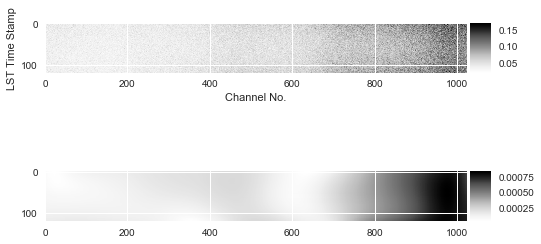

In [11]:
mpl.style.use('seaborn')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8, 5))

# Get LST's
closures_last = closures_noise['last']
print(closures_last)

im1 = ax1.imshow(stdev_noise[:,0,:])
ax1.set_xlabel('Channel No.')
ax1.set_ylabel('LST Time Stamp')
im2 = ax2.imshow(stdev_noiseless[:,0,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
        
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
plt.colorbar()
plt.show()